In [1]:
#important neccessary libraries, can probably get read of two. Come back to!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
base_questionnaire = "../clean_personality_dataset.csv"
base_questionnaire_df = pd.read_csv(base_questionnaire)

answer_only = "../answer_only_dataset.csv"
answer_only_df = pd.read_csv(answer_only)

#check

answer_only_df

,EXT1 : I am the life of the party.,EXT2 : I don't talk a lot.,EXT3 : I feel comfortable around people.,EXT4 : I keep in the background.,EXT5 : I start conversations.,EXT6 : I have little to say.,EXT7 : I talk to a lot of different people at parties.,EXT8 : I don't like to draw attention to myself.,EXT9 : I don't mind being the center of attention.,EXT10 : I am quiet around strangers.,...,OPN1 : I have a rich vocabulary.,OPN2 : I have difficulty understanding abstract ideas.,OPN3 : I have a vivid imagination.,OPN4 : I am not interested in abstract ideas.,OPN5 : I have excellent ideas.,OPN6 : I do not have a good imagination.,OPN7 : I am quick to understand things.,OPN8 : I use difficult words.,OPN9 : I spend time reflecting on things.,OPN10 : I am full of ideas.
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694881,4.0,1.0,4.0,2.0,4.0,3.0,3.0,2.0,3.0,2.0,...,3.0,3.0,5.0,3.0,4.0,2.0,5.0,2.0,3.0,4.0
694882,5.0,1.0,5.0,2.0,4.0,2.0,3.0,1.0,5.0,1.0,...,4.0,1.0,4.0,2.0,3.0,2.0,5.0,3.0,4.0,4.0
694883,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
694884,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [3]:
#K-means

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#explain scaler and PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(answer_only_df)

pca = PCA(n_components=50)

In [5]:
pca_data = pca.fit_transform(data_scaled)

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pca_data)

KMeans(n_clusters=5, random_state=42)

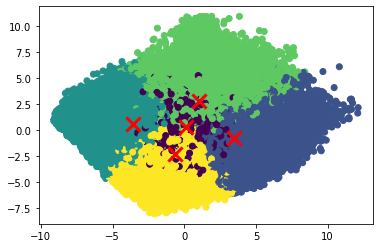

In [7]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=200, linewidths=3, color='r')
plt.show()

In [8]:
answer_plus_clusterscore = answer_only_df.copy()

# add cluster number as a new column to the copy
answer_plus_clusterscore["cluster"] = kmeans.labels_

# print the first 5 rows of the updated copy
answer_plus_clusterscore

,EXT1 : I am the life of the party.,EXT2 : I don't talk a lot.,EXT3 : I feel comfortable around people.,EXT4 : I keep in the background.,EXT5 : I start conversations.,EXT6 : I have little to say.,EXT7 : I talk to a lot of different people at parties.,EXT8 : I don't like to draw attention to myself.,EXT9 : I don't mind being the center of attention.,EXT10 : I am quiet around strangers.,...,OPN2 : I have difficulty understanding abstract ideas.,OPN3 : I have a vivid imagination.,OPN4 : I am not interested in abstract ideas.,OPN5 : I have excellent ideas.,OPN6 : I do not have a good imagination.,OPN7 : I am quick to understand things.,OPN8 : I use difficult words.,OPN9 : I spend time reflecting on things.,OPN10 : I am full of ideas.,cluster
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,4
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694881,4.0,1.0,4.0,2.0,4.0,3.0,3.0,2.0,3.0,2.0,...,3.0,5.0,3.0,4.0,2.0,5.0,2.0,3.0,4.0,4
694882,5.0,1.0,5.0,2.0,4.0,2.0,3.0,1.0,5.0,1.0,...,1.0,4.0,2.0,3.0,2.0,5.0,3.0,4.0,4.0,4
694883,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,4
694884,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,0


In [9]:
#create a copy of the original dataframe
base_questionnaire_clusterscore = base_questionnaire_df.copy()

#add cluster number as a new column to the copy of the orginal dataframe
base_questionnaire_clusterscore["cluster"] = kmeans.labels_

#check the dataframe
base_questionnaire_clusterscore

,EXT1 : I am the life of the party.,EXT2 : I don't talk a lot.,EXT3 : I feel comfortable around people.,EXT4 : I keep in the background.,EXT5 : I start conversations.,EXT6 : I have little to say.,EXT7 : I talk to a lot of different people at parties.,EXT8 : I don't like to draw attention to myself.,EXT9 : I don't mind being the center of attention.,EXT10 : I am quiet around strangers.,...,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err,cluster
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991,2
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706,0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833,0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25,4
4,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,1600.0,1000.0,4.0,196.0,3,1,SE,59.3333,18.05,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694881,4.0,1.0,4.0,2.0,4.0,3.0,3.0,2.0,3.0,2.0,...,2560.0,1080.0,36.0,209.0,16,1,GB,52.4189,-1.5054,4
694882,5.0,1.0,5.0,2.0,4.0,2.0,3.0,1.0,5.0,1.0,...,375.0,667.0,10.0,245.0,9,1,TR,41.0186,28.9647,4
694883,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0,4
694884,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067,0


In [10]:
#Just in case I want to dive in each cluster seperately 
cluster_0 = answer_plus_clusterscore[kmeans.labels_ == 0].copy()
cluster_1 = answer_plus_clusterscore[kmeans.labels_ == 1].copy()
cluster_2 = answer_plus_clusterscore[kmeans.labels_ == 2].copy()
cluster_3 = answer_plus_clusterscore[kmeans.labels_ == 3].copy()
cluster_4 = answer_plus_clusterscore[kmeans.labels_ == 4].copy()

#check if the combined rows of each cluster datafram match the amount of rows in the answer_plus_clusterscore dataframe.
len(cluster_0)+ len(cluster_1)+len(cluster_2)+ len(cluster_3)+ len(cluster_4)

694886

In [11]:
#save and write data
answer_plus_clusterscore.to_csv("../answer_only_kmeansclusters.csv", encoding="utf-8", index=False)
base_questionnaire_clusterscore.to_csv("../clean_personality_kmeansclusters.csv", encoding="utf-8", index=False)

In [12]:
############ hierarchical clustering, and DBSCAN, or use Neural networks